We'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. We've made a few modifications from the original dataset that was uploaded to Kaggle:

We sampled 50,000 data points from the full dataset, to ensure your code runs quickly in our hosted environment
We dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)


The data dictionary provided with data is as follows:
- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings. You'll also become familiar with some of the unique benefits jupyter notebook provides for pandas.


---



I found the type of encoding for this file by doing as below to assign the type of encoding in read_csv() method since I was getting "unicodedecodeerror: 'utf-8' codec can't decode byte 0xdc in position 23: invalid continuation byte".

In [1]:
file = '/Users/kitaeklee/Desktop/Data/DQ/DQ_ebay_car_sales_data/DQ_ebay_car_sales_data.csv'

import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [2]:
import pandas as pd

autos = pd.read_csv(file, encoding = 'Windows-1252')

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


- There are some columns with null values but none of them have more than 20% of the total number of values.
- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores. Camel case write phrases without spaces of punctuation, indicating the separation of words with a single capitalized letter. Sneak case replace each space by an underscore(__).

---

Therefore, I converted the column names from camel case to sneak case and reword some of the column names based on the data dictionary to be more descriptive as below.

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.rename(columns={'dateCrawled' : 'date_crawled',
                      'offerType' : 'offer_type',
                      'vehicleType' : 'vehicle_type',
                      'yearOfRegistration': 'registration_year',
                     'monthOfRegistration' : 'registration_month',
                      'fuelType' : 'fuel_type',
                     'notRepairedDamage' : 'unrepaired_damage',
                      'dateCreated' : 'ad_created',
                     'nrOfPictures' : 'nr_of_pictures',
                     'postalCode' : 'postal_code',
                     'lastSeen' : 'last_seen', 
                 'odometer':'odometer_km'},
                 inplace=True)

Look for dupliactes where all or almost all values are the same in text columns. 

In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-11 22:38:16,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


- Any columns that have mostly one value that are candidates to be dropped
- Any columns that need more investigation.
- Any examples of numeric data stored as text that needs to be cleaned.

price and odometer_km columns are numeric values stored as text. Hence, remove any non-numeric characters then convert the values into numeric dtype.

replace() method can only be used with string value, therefore convert the values into string first then replace the non-numeric characters or letter into "".

In [8]:
autos['price'] = autos['price'].str.replace("$", "")
autos['price'] = autos['price'].str.replace(",", "")
autos['odometer_km'] = autos['odometer_km'].str.replace("km", "")
autos['odometer_km'] = autos['odometer_km'].str.replace(",", "")


Convert dtype into numeric dtype since non-numeric characters are now removed.

In [9]:
autos['price'] = autos['price'].astype('int64')
autos['odometer_km'] = autos['odometer_km'].astype('int64')

---
## Data Preprocessing: Removing rows with outliers
Analyze the columns using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that we might want to remove.

In [10]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### 'price' column

In [11]:
autos['price'].nunique()

2357

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=autos['price'])

plt.ticklabel_format(style='plain', axis='x',useOffset=False)

As shown in the boxplot above, there are outliers in 'price' column.

In [13]:
autos['price'].describe().apply(lambda x: format(x, 'f'))

count       50000.000000
mean         9840.043760
std        481104.380500
min             0.000000
25%          1100.000000
50%          2950.000000
75%          7200.000000
max      99999999.000000
Name: price, dtype: object

Mean value is approximately 9840 and Standard Deviation is 481104 therefore the values are dispersed by roughly 481104 on average. So I will consider the values larger than 9840 + 481104 = 490,944 as outliers.

In [14]:
autos['price'].value_counts()

0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price, Length: 2357, dtype: int64

In [15]:
autos['price'].sort_index(ascending=False)

49999     1250
49998    22900
49997    13200
49996     1980
49995    24900
         ...  
4         1350
3         4350
2         8990
1         8500
0         5000
Name: price, Length: 50000, dtype: int64

In [16]:
autos['price'].sort_values(ascending=True).tail(20)

47337      259000
12682      265000
35923      295000
34723      299000
14715      345000
36818      350000
37585      999990
514        999999
43049      999999
22947     1234566
7814      1300000
47634     3890000
11137    10000000
24384    11111111
2897     11111111
27371    12345678
47598    12345678
39377    12345678
42221    27322222
39705    99999999
Name: price, dtype: int64

In [17]:
autos['price'][autos['price'] > 481104]

514        999999
2897     11111111
7814      1300000
11137    10000000
22947     1234566
24384    11111111
27371    12345678
37585      999990
39377    12345678
39705    99999999
42221    27322222
43049      999999
47598    12345678
47634     3890000
Name: price, dtype: int64

--> There are 14 outliers in 'price' column. Therefore, remove the rows with outliers as below.

In [18]:
autos = autos[autos['price'] < 481104]

--> 14 rows with outliers are removed from 'autos' dataframe.

In [19]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


---
There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Right now, the date_crawled, last_seen, and ad_created columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation

In [20]:
# normalize shows the percentage of each value takes
autos['date_crawled'].value_counts(normalize=True, dropna=False)

2016-03-23 18:39:34    0.00006
2016-03-21 16:37:21    0.00006
2016-03-23 19:38:20    0.00006
2016-04-04 16:40:33    0.00006
2016-03-29 23:42:13    0.00006
                        ...   
2016-03-31 19:38:35    0.00002
2016-03-26 17:38:22    0.00002
2016-03-10 16:48:08    0.00002
2016-03-21 12:38:53    0.00002
2016-03-21 00:59:06    0.00002
Name: date_crawled, Length: 48200, dtype: float64

To rank by date in ascending order

In [21]:
autos['date_crawled'].sort_index()

0        2016-03-26 17:47:46
1        2016-04-04 13:38:56
2        2016-03-26 18:57:24
3        2016-03-12 16:58:10
4        2016-04-01 14:38:50
                ...         
49995    2016-03-27 14:38:19
49996    2016-03-28 10:50:25
49997    2016-04-02 14:44:48
49998    2016-03-08 19:25:42
49999    2016-03-14 00:42:12
Name: date_crawled, Length: 49986, dtype: object

In [22]:
autos['date_crawled'].describe()

count                   49986
unique                  48200
top       2016-03-23 18:39:34
freq                        3
Name: date_crawled, dtype: object

In [23]:
autos['registration_year'].describe()

count    49986.000000
mean      2005.075721
std        105.727161
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

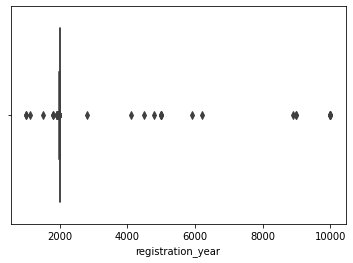

In [24]:
sns.boxplot(autos['registration_year'])

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [25]:
autos = autos[1900 < autos['registration_year']]
autos = autos[autos['registration_year'] < 2016]

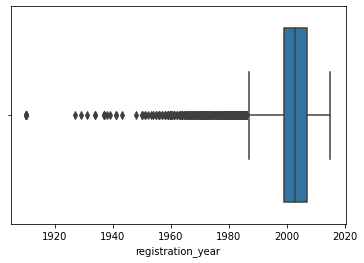

In [26]:
sns.boxplot(autos['registration_year'])

All the rows with seemingly inaccurate registration years are removed.

---

### Data Aggregation

- Identify the unique values we want to aggregate by
- Create an empty dictionary to store our aggregate data
- Loop over the unique values, and for each:
    - Subset the dataframe by the unique values
    - Calculate the mean of whichever column we're interested in
    - Assign the val/mean to the dict as k/v.

Aggregate the data based on the brand and mean value of price.

In [27]:
autos['brand'].value_counts(normalize=True)

volkswagen        0.211199
bmw               0.111221
opel              0.106809
mercedes_benz     0.096338
audi              0.086959
ford              0.069615
renault           0.046724
peugeot           0.029358
fiat              0.025610
seat              0.018030
skoda             0.016274
mazda             0.015096
nissan            0.015054
smart             0.013919
citroen           0.013876
toyota            0.012527
sonstige_autos    0.011006
hyundai           0.009893
volvo             0.009379
mini              0.008672
mitsubishi        0.008116
honda             0.007837
kia               0.007238
alfa_romeo        0.006660
porsche           0.006167
suzuki            0.005889
chevrolet         0.005760
chrysler          0.003683
daihatsu          0.002591
dacia             0.002591
jeep              0.002270
subaru            0.002184
land_rover        0.002056
jaguar            0.001627
saab              0.001627
trabant           0.001585
daewoo            0.001499
r

In [28]:
brand_list = autos['brand'].unique()
brand_list

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'sonstige_autos',
       'opel', 'mazda', 'porsche', 'mini', 'toyota', 'dacia', 'nissan',
       'jeep', 'saab', 'volvo', 'mitsubishi', 'jaguar', 'fiat', 'skoda',
       'subaru', 'kia', 'citroen', 'chevrolet', 'hyundai', 'honda',
       'daewoo', 'suzuki', 'trabant', 'land_rover', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [29]:
# empty dictionary
brands_by_price = {}

In [30]:
# insert mean of price for each brand in the empty dictionary 
# as brand as key and mean as value
for brand in brand_list:
    brands_by_price[brand] = autos['price'][autos['brand']==brand].mean()

In [31]:
brands_by_price.items()

dict_items([('peugeot', 3073.8628738147336), ('bmw', 8172.071236041586), ('volkswagen', 5318.114670992599), ('smart', 3577.2815384615383), ('ford', 3720.820978160566), ('chrysler', 3289.4302325581393), ('seat', 4323.795724465558), ('renault', 2417.1516956920254), ('mercedes_benz', 8568.267615025561), ('audi', 9131.006156119183), ('sonstige_autos', 10300.305447470817), ('opel', 2917.0316760224537), ('mazda', 4089.112056737589), ('porsche', 42598.15972222222), ('mini', 10495.725925925926), ('toyota', 5186.899145299145), ('dacia', 5986.446280991736), ('nissan', 4752.941678520626), ('jeep', 11610.877358490567), ('saab', 3243.684210526316), ('volvo', 4790.554794520548), ('mitsubishi', 3407.232189973615), ('jaguar', 11176.197368421053), ('fiat', 2758.178929765886), ('skoda', 6316.332894736842), ('subaru', 3846.3627450980393), ('kia', 5819.733727810651), ('citroen', 3763.625), ('chevrolet', 6543.423791821561), ('hyundai', 5407.123376623376), ('honda', 4053.0601092896177), ('daewoo', 1046.1428

In [32]:
df_ex = autos.loc[:, ['price', 'brand']]
df_ex[df_ex['brand'] == 'audi'].mean()

price    9131.006156
dtype: float64

In [35]:
brands_by_price_order = dict(sorted(brands_by_price.items(),
                       key=lambda item: item[1], reverse=True))


In [36]:
brands_by_price_order

{'porsche': 42598.15972222222,
 'land_rover': 18585.447916666668,
 'jeep': 11610.877358490567,
 'jaguar': 11176.197368421053,
 'mini': 10495.725925925926,
 'sonstige_autos': 10300.305447470817,
 'audi': 9131.006156119183,
 'mercedes_benz': 8568.267615025561,
 'bmw': 8172.071236041586,
 'chevrolet': 6543.423791821561,
 'skoda': 6316.332894736842,
 'dacia': 5986.446280991736,
 'kia': 5819.733727810651,
 'hyundai': 5407.123376623376,
 'volkswagen': 5318.114670992599,
 'toyota': 5186.899145299145,
 'volvo': 4790.554794520548,
 'nissan': 4752.941678520626,
 'seat': 4323.795724465558,
 'mazda': 4089.112056737589,
 'honda': 4053.0601092896177,
 'suzuki': 4046.930909090909,
 'alfa_romeo': 4043.3569131832796,
 'subaru': 3846.3627450980393,
 'citroen': 3763.625,
 'ford': 3720.820978160566,
 'smart': 3577.2815384615383,
 'mitsubishi': 3407.232189973615,
 'chrysler': 3289.4302325581393,
 'lancia': 3246.3653846153848,
 'saab': 3243.684210526316,
 'peugeot': 3073.8628738147336,
 'opel': 2917.0316760

--> I aggregated the data acorss brands and their mean price. Brands and mean prices above are in descending order, from the most expensive to the cheapest.

In [37]:
brands_by_price_order.keys()

dict_keys(['porsche', 'land_rover', 'jeep', 'jaguar', 'mini', 'sonstige_autos', 'audi', 'mercedes_benz', 'bmw', 'chevrolet', 'skoda', 'dacia', 'kia', 'hyundai', 'volkswagen', 'toyota', 'volvo', 'nissan', 'seat', 'mazda', 'honda', 'suzuki', 'alfa_romeo', 'subaru', 'citroen', 'ford', 'smart', 'mitsubishi', 'chrysler', 'lancia', 'saab', 'peugeot', 'opel', 'fiat', 'lada', 'renault', 'rover', 'trabant', 'daihatsu', 'daewoo'])

Visualize the brands and corresponding ***mean price***.

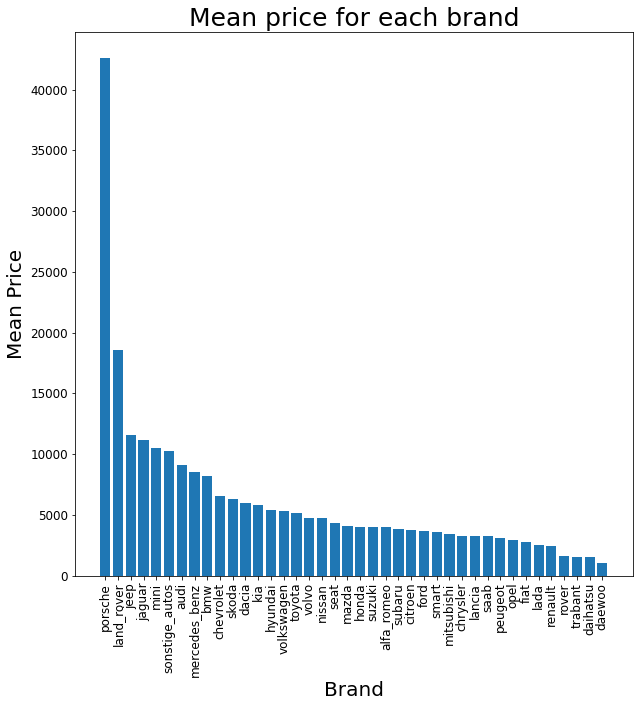

In [74]:

plt.figure(figsize=(10,10))
plt.bar(brands_by_price_order.keys(), brands_by_price_order.values())

plt.title('Mean price for each brand', fontsize=25)
plt.xlabel('Brand', fontsize=20)
plt.ylabel('Mean Price', fontsize=20)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12)
plt.show()

Visualize the ***mean mileage***.

In [40]:
df_new_mile = autos.loc[:, ['brand', 'odometer_km']]

df_new_mile

,brand,odometer_km
0,peugeot,150000
1,bmw,150000
2,volkswagen,70000
3,smart,70000
4,ford,150000
...,...,...
49995,audi,100000
49996,opel,150000
49997,fiat,5000
49998,audi,40000


In [57]:
df_mile_grouped = df_new_mile.groupby('brand').mean()

df_mile_grouped = df_mile_grouped.sort_values(by='odometer_km', ascending=False).reset_index()

In [58]:
df_mile_grouped

,brand,odometer_km
0,saab,144342.105263
1,rover,138387.096774
2,volvo,138196.347032
3,chrysler,132790.697674
4,bmw,132311.320755
5,alfa_romeo,131141.479100
6,mercedes_benz,130711.269171
7,audi,129282.196503
8,opel,129140.938252
9,volkswagen,128455.845078


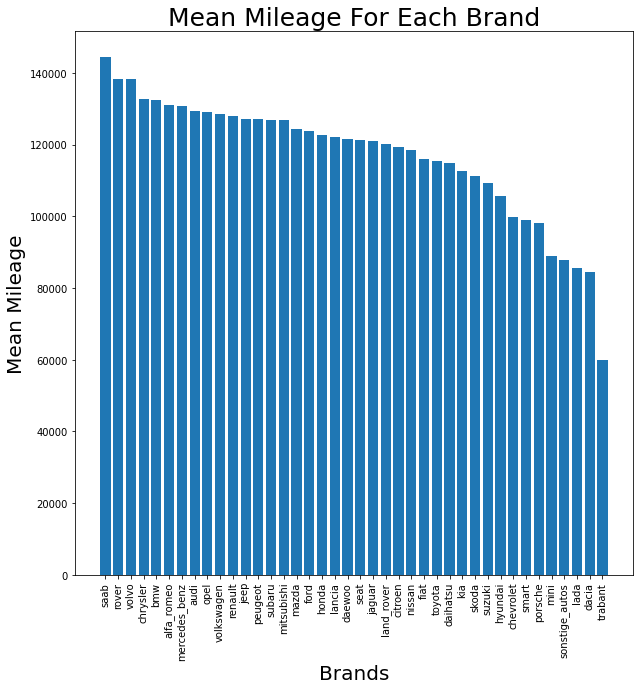

In [73]:
plt.figure(figsize=[10,10])
plt.bar(df_mile_grouped['brand'], df_mile_grouped['odometer_km'])

plt.title('Mean Mileage For Each Brand', fontsize=25)
plt.xlabel('Brands', fontsize=20)
plt.ylabel('Mean Mileage', fontsize=20)
plt.xticks(rotation=90)

plt.show()